# Demo Model

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rivalry as rv
%matplotlib inline

## system parameters

In [24]:
!ls *.pkl

bach.pkl       beethoven6.pkl brahms.pkl     chopin.pkl     couperin2.pkl
bach140.pkl    beethoven7.pkl bruch.pkl      chopin2.pkl    faure.pkl
barber.pkl     beethoven8.pkl bruch200.pkl   copland.pkl    strauss.pkl
beethoven.pkl  bizet.pkl      cepbach.pkl    couperin.pkl


In [12]:
#

In [13]:
name = str('couperin2.pkl')

In [14]:
par = pd.read_pickle(name)
theta = pd.Series(par)
print theta

alpha       0.000129
beta        0.894800
gamma       0.863608
kb          0.131532
kc          0.004062
ks          0.217476
mu          0.891496
sigma       0.029572
tau_a    2566.041666
tau_u      10.956773
Name: 51, dtype: float64


## run dynamics for system parameters and stimulus conditions

In [15]:
ONSET = np.arange(200)
condition = [0,1,2,3,4]

dt = 1
dom_ms = 500000
onset_ms= 6000

prestim = 6000

PERCENT_IMBALANCE = {}
PERCENT_IMBALANCE={n:[] for n in condition}
DOMINANCE_INTERVALS = {}
DOMINANCE_INTERVALS = {n:[] for n in condition}
DYNAMICS_ACTIVITY = {}
DYNAMICS_ACTIVITY = {n:[] for n in condition}
DYNAMICS_ONSET = {}
DYNAMICS_ONSET = {n:[] for n in condition}

In [16]:
for imbalance in PERCENT_IMBALANCE.keys():
    
    r = imbalance
    print r
    
    DOM1 = []
    DOM2 = []
    LEADER = []
    
    run_dom = {}
    U1d = []
    U2d = []
    Td = []

    run_dom = rv.dynamics(theta,r,dom_ms,prestim,dt,full=True)
    U1d = np.asarray(run_dom.pop('u1'))
    U2d = np.asarray(run_dom.pop('u2'))
    Td = np.asarray(run_dom.pop('t'))

    run_dom.clear()

    td1 = rv.dominance(Td,U1d,U2d,prestim)
    td2 = rv.dominance(Td,U2d,U1d,prestim)

    DOM1.extend(td1)
    DOM2.extend(td2)

    TD1 = np.array(DOM1)
    TD2 = np.array(DOM2)
    
    DYN={}
    DYN['U1'] = U1d
    DYN['U2'] = U2d
    DYN['TIME'] = Td
    
    DOM = {}
    DOM['U1'] = TD1
    DOM['U2'] = TD2
    
    for trial in ONSET:

            run_onset = {}
            U1p = []
            U2p = []
            Tp = []

            run_onset = rv.dynamics(theta,r,onset_ms,prestim,dt,full=True)

            U1p = np.asarray(run_onset.pop('u1'))
            U2p = np.asarray(run_onset.pop('u2'))
            Tp = np.asarray(run_onset.pop('t'))

            run_onset.clear()

            first = rv.first_epoch(U1p,U2p,Tp,prestim,dt)
            LEADER.append(first)
        
    ONS={}
    ONS['U1'] = U1p
    ONS['U2'] = U2p
    ONS['TIME'] = Tp
    ONS['LEADER_RESULTS'] = LEADER
    
    FINAL_DATA = {}
    FINAL_DATA['FIRST_EPOCH_PROB_U1'] = rv.prob_seq(LEADER,1,2)
    FINAL_DATA['FIRST_EPOCH_PROB_U2'] = rv.prob_seq(LEADER,2,1)
    FINAL_DATA['COUNTS_U1'] = LEADER.count(1)
    FINAL_DATA['COUNTS_U2'] = LEADER.count(2)
    FINAL_DATA['MEAN_U1'] = np.mean(TD1)
    FINAL_DATA['MEAN_U2'] = np.mean(TD2)
    FINAL_DATA['SD_U1'] = np.std(TD1)
    FINAL_DATA['SD_U2'] = np.std(TD2)

    
    DYNAMICS_ACTIVITY[imbalance] = DYN #only from last trial
    DYNAMICS_ONSET[imbalance] = ONS #only from last trial
    DOMINANCE_INTERVALS[imbalance] = DOM
    PERCENT_IMBALANCE[imbalance] = FINAL_DATA

print "done"

0
1
2
3
4
done


## plot activity dynamics

In [17]:
#create pandas series for each contrast imbalance value
DYN0 = pd.Series(DYNAMICS_ACTIVITY[0])
DYN1 = pd.Series(DYNAMICS_ACTIVITY[1])
DYN2 = pd.Series(DYNAMICS_ACTIVITY[2])
DYN3 = pd.Series(DYNAMICS_ACTIVITY[3])
DYN4 = pd.Series(DYNAMICS_ACTIVITY[4])
#create pandas series for each contrast imbalance value
ONS0 = pd.Series(DYNAMICS_ONSET[0])
ONS1 = pd.Series(DYNAMICS_ONSET[1])
ONS2 = pd.Series(DYNAMICS_ONSET[2])
ONS3 = pd.Series(DYNAMICS_ONSET[3])
ONS4 = pd.Series(DYNAMICS_ONSET[4])

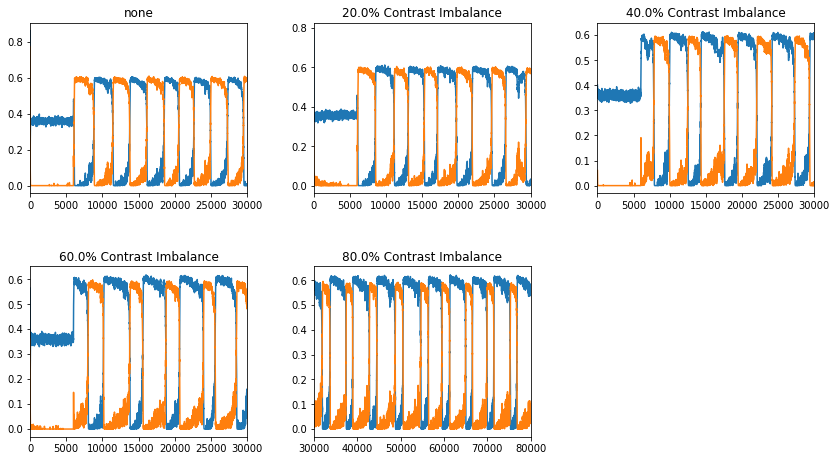

In [18]:
fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(331)
ax1 = fig.add_subplot(332)
ax2 = fig.add_subplot(333)
ax3 = fig.add_subplot(334)
ax4 = fig.add_subplot(335)

ax0.plot(DYN0.TIME,DYN0.U1,DYN0.TIME,DYN0.U2)
ax1.plot(DYN1.TIME,DYN1.U1,DYN1.TIME,DYN1.U2)
ax2.plot(DYN2.TIME,DYN2.U1,DYN2.TIME,DYN2.U2)
ax3.plot(DYN3.TIME,DYN3.U1,DYN3.TIME,DYN3.U2)
ax4.plot(DYN4.TIME,DYN4.U1,DYN4.TIME,DYN4.U2)

xmax=30000
ax0.set_xlim(0,xmax)
ax1.set_xlim(0,xmax)
ax2.set_xlim(0,xmax)
ax3.set_xlim(0,xmax)
ax4.set_xlim(xmax,80000)
#ax0.set_ylim(-0.1,2.0)
#ax1.set_ylim(-0.1,2.0)
#ax2.set_ylim(-0.1,2.0)
#ax3.set_ylim(-0.1,2.0)
#ax4.set_ylim(-0.1,2.0)
#plt.legend(loc=9)

ax0.set_title('none')
ax1.set_title('20.0% Contrast Imbalance')
ax2.set_title('40.0% Contrast Imbalance')
ax3.set_title('60.0% Contrast Imbalance')
ax4.set_title('80.0% Contrast Imbalance')

fig.tight_layout()
fig.get_figure()

fig.set_size_inches(12,10)
#fig.savefig('/Users/carly/Desktop/possiblydone/activityplt05.png', dpi=100)

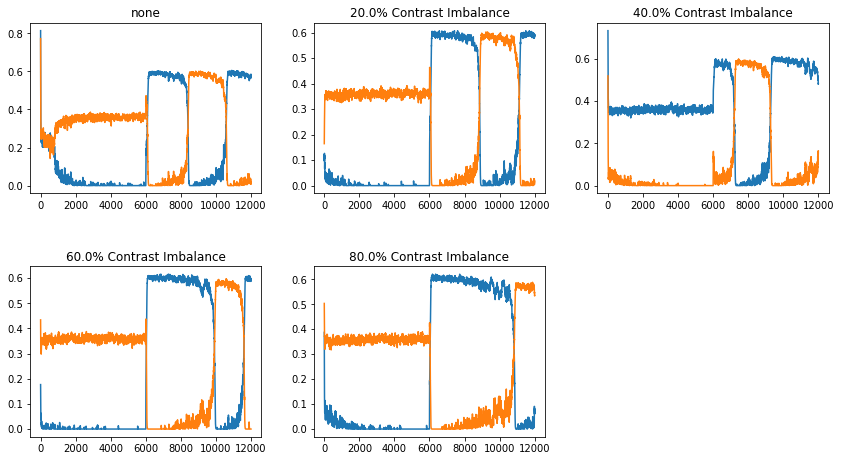

In [19]:
fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(331)
ax1 = fig.add_subplot(332)
ax2 = fig.add_subplot(333)
ax3 = fig.add_subplot(334)
ax4 = fig.add_subplot(335)

ax0.plot(ONS0.TIME,ONS0.U1,ONS0.TIME,ONS0.U2)
ax1.plot(ONS1.TIME,ONS1.U1,ONS1.TIME,ONS1.U2)
ax2.plot(ONS2.TIME,ONS2.U1,ONS2.TIME,ONS2.U2)
ax3.plot(ONS3.TIME,ONS3.U1,ONS3.TIME,ONS3.U2)
ax4.plot(ONS4.TIME,ONS4.U1,ONS4.TIME,ONS4.U2)

#ax0.set_xlim(0,0.25)
#ax1.set_xlim(2,5)
#ax2.set_xlim(2,5)
#ax3.set_xlim(2,5)
#ax4.set_xlim(2,5)
#ax0.set_ylim(-0.1,2.0)
#ax1.set_ylim(-0.1,2.0)
#ax2.set_ylim(-0.1,2.0)
#ax3.set_ylim(-0.1,2.0)
#ax4.set_ylim(-0.1,2.0)
#plt.legend(loc=9)

ax0.set_title('none')
ax1.set_title('20.0% Contrast Imbalance')
ax2.set_title('40.0% Contrast Imbalance')
ax3.set_title('60.0% Contrast Imbalance')
ax4.set_title('80.0% Contrast Imbalance')

fig.tight_layout()
fig.get_figure()

fig.set_size_inches(12,10)
#fig.savefig('/Users/carly/Desktop/possiblydone/activityplt05.png', dpi=100)

## assemble results in dataframe and calculate CV

In [20]:
model_data = pd.DataFrame(PERCENT_IMBALANCE).T
model_data['CV U1'] = model_data['SD_U1']/model_data['MEAN_U1']
model_data['CV U2'] = model_data['SD_U2']/model_data['MEAN_U2']
model_data

,COUNTS_U1,COUNTS_U2,FIRST_EPOCH_PROB_U1,FIRST_EPOCH_PROB_U2,MEAN_U1,MEAN_U2,SD_U1,SD_U2,CV U1,CV U2
0,91.0,109.0,0.455,0.545,1607.201299,1605.668831,974.961507,973.859707,0.606621,0.606513
1,171.0,29.0,0.855,0.145,1850.689655,1521.455172,1057.006773,864.932702,0.571142,0.568490
2,193.0,7.0,0.965,0.035,2017.468966,1352.862069,1241.037620,825.152806,0.615146,0.609931
3,198.0,2.0,0.990,0.010,2437.669231,1311.176923,1390.782892,738.418898,0.570538,0.563173
4,200.0,0.0,1.000,0.000,2732.682540,1144.436508,1777.234139,727.481429,0.650362,0.635668


In [21]:
model_dynamics = pd.DataFrame(DYNAMICS_ACTIVITY).T
model_dyn_onset = pd.DataFrame(DYNAMICS_ONSET).T
model_dominance = pd.DataFrame(DOMINANCE_INTERVALS).T

In [22]:
#model_data.to_pickle('/Users/carly/CODE/modeldata.pkl')
#model_dynamics.to_pickle('/Users/carly/CODE/modeldynamics.pkl')
#model_dyn_onset.to_pickle('/Users/carly/CODE/modeldynonset.pkl')
#model_dominance.to_pickle('/Users/carly/CODE/modeldominance.pkl')

,U1,U2
0,"[1955, 2201, 2119, 1837, 2014, 2174, 1975, 205...","[2042, 1919, 1902, 2125, 2058, 2279, 2083, 201..."
1,"[2263, 2, 2224, 2066, 2527, 2, 1921, 2143, 195...","[1827, 3, 1772, 1833, 1753, 2, 1582, 1727, 134..."
2,"[2497, 9, 3, 2344, 2, 2612, 2252, 2629, 2827, ...","[1610, 1447, 2, 2, 3, 1641, 1622, 1792, 1715, ..."
3,"[3282, 2510, 2772, 2868, 2948, 2, 3043, 2772, ...","[1499, 1576, 1600, 1417, 3, 1624, 1551, 1492, ..."
4,"[3809, 3626, 3, 5545, 4559, 4131, 3925, 5155, ...","[1335, 1421, 2, 1338, 1359, 1339, 1500, 1411, ..."


## distribution of mean dominance intervals

In [11]:
#create pandas series for each contrast imbalance value
R0 = pd.Series(DOMINANCE_INTERVALS[0])
R1 = pd.Series(DOMINANCE_INTERVALS[1])
R2 = pd.Series(DOMINANCE_INTERVALS[2])
R3 = pd.Series(DOMINANCE_INTERVALS[3])
R4 = pd.Series(DOMINANCE_INTERVALS[4])

#combine mean dominance intervals for both percepts
d0_all = np.concatenate((R0.U1,R0.U2),axis=0)
d1_all = np.concatenate((R1.U1,R1.U2),axis=0)
d2_all = np.concatenate((R2.U1,R2.U2),axis=0)
d3_all = np.concatenate((R3.U1,R3.U2),axis=0)
d4_all = np.concatenate((R4.U1,R4.U2),axis=0)

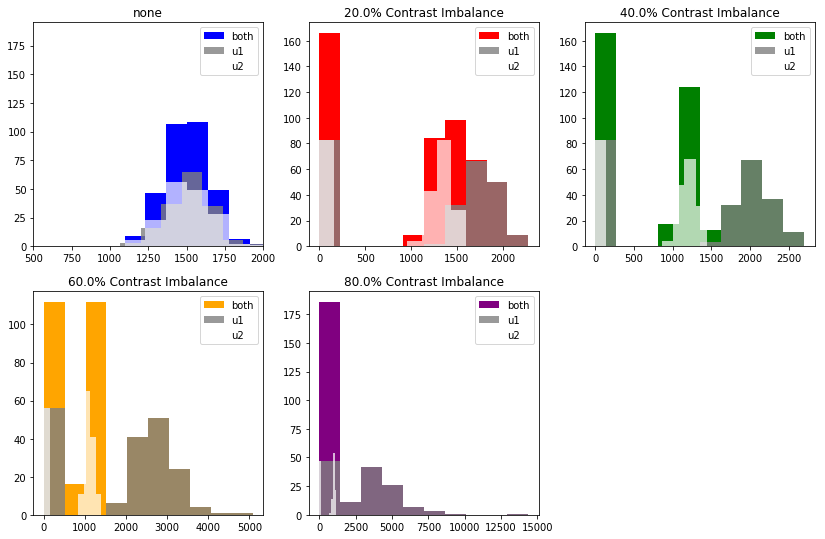

In [12]:
b=15
b2=10

fig = plt.figure(figsize=(12,12))
ax0 = fig.add_subplot(331)
ax1 = fig.add_subplot(332)
ax2 = fig.add_subplot(333)
ax3 = fig.add_subplot(334)
ax4 = fig.add_subplot(335)

h0 = ax0.hist(d0_all,color='blue',bins=15,label='both')
h0_u1 = ax0.hist(R0.U1,color='gray',bins=15,alpha=0.8,label='u1')
h0_u2 = ax0.hist(R0.U2,color='white',bins=15,alpha=0.7,label='u2')

h1 = ax1.hist(d1_all,color='red',label='both')
h1_u1 = ax1.hist(R1.U1,color='gray',alpha=0.8,label='u1')
h1_u2 = ax1.hist(R1.U2,color='white',alpha=0.7,label='u2')

h2 = ax2.hist(d2_all,color='green',label='both')
h2_u1 = ax2.hist(R2.U1,color='gray',alpha=0.8,label='u1')
h2_u2 = ax2.hist(R2.U2,color='white',alpha=0.7,label='u2')

h3 = ax3.hist(d3_all,color='orange',label='both')
h3_u1 = ax3.hist(R3.U1,color='gray',alpha=0.8,label='u1')
h3_u2 = ax3.hist(R3.U2,color='white',alpha=0.7,label='u2')

h4 = ax4.hist(d4_all,color='purple',label='both')
h4_u1 = ax4.hist(R4.U1,color='gray',alpha=0.8,label='u1')
h4_u2 = ax4.hist(R4.U2,color='white',alpha=0.7,label='u2')

ax0.set_xlim(500,2000)
#ax1.set_xlim(0,6)
#ax2.set_xlim(0,6)
#ax3.set_xlim(0,6)
#ax4.set_xlim(0,8)
#ax0.set_ylim(0,100)
#ax1.set_ylim(0,100)
#ax2.set_ylim(0,100)
#ax3.set_ylim(0,100)
#ax4.set_ylim(0,100)

ax0.legend()
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

ax0.set_title('none')
ax1.set_title('20.0% Contrast Imbalance')
ax2.set_title('40.0% Contrast Imbalance')
ax3.set_title('60.0% Contrast Imbalance')
ax4.set_title('80.0% Contrast Imbalance')
      
fig.get_figure()
fig.set_size_inches(14,14)
#fig.savefig('/Users/carly/Desktop/possiblydone/05_domhist.png', dpi=100)

In [19]:
bindex = ['0%','20%','40%','60%','80%']

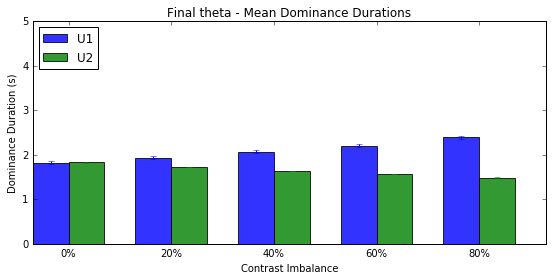

In [20]:
# data to plot
n_groups = 5
means_U1 = model_data['U1_MEAN']
std_U1 = model_data['U1_STD']
means_U2 = model_data['U2_MEAN']
std_U2 = model_data['U2_STD']

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_U1, bar_width,
                 alpha=opacity,
                 color='blue',
                 label='U1',
                 yerr=std_U1)
 
rects2 = plt.bar(index + bar_width, means_U2, bar_width,
                 alpha=opacity,
                 color='green',
                 label='U2',
                 yerr=std_U2)
 
plt.xlabel('Contrast Imbalance')
plt.ylabel('Dominance Duration (s)')
plt.ylim(0,5)

plt.title('Final theta - Mean Dominance Durations')
plt.xticks(index + bar_width, bindex)
plt.legend(loc=2)
 
plt.tight_layout()
fig = ax.get_figure()       
fig.set_size_inches(8,4)

#fig.savefig('/Users/carly/Desktop/possiblydone/05_modelmeantimesbar.png', dpi=100)

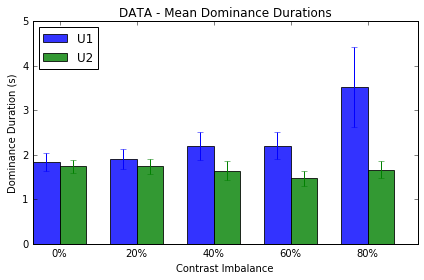

In [21]:
# data to plot
n_groups = 5
sy_U1 = syU1['MEAN']
sySEM_U1 = syU1['SEM']
sy_U2 = syU2['MEAN']
sySEM_U2 = syU2['SEM']
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, sy_U1, bar_width,
                 alpha=opacity,
                 color='blue',
                 label='U1',
                 yerr=sySEM_U1)
 
rects2 = plt.bar(index + bar_width, sy_U2, bar_width,
                 alpha=opacity,
                 color='green',
                 label='U2',
                 yerr=sySEM_U2)
 
plt.xlabel('Contrast Imbalance')
plt.ylabel('Dominance Duration (s)')
plt.ylim(0,5)

plt.title('DATA - Mean Dominance Durations')
plt.xticks(index + bar_width, bindex)
plt.legend(loc=2)
 
plt.tight_layout()
plt.show()
fig = ax.get_figure()       
fig.set_size_inches(8,4)

#fig.savefig('DATA_meandomtimes.png', dpi=100)

In [27]:
syprob

NameError: name 'syprob' is not defined

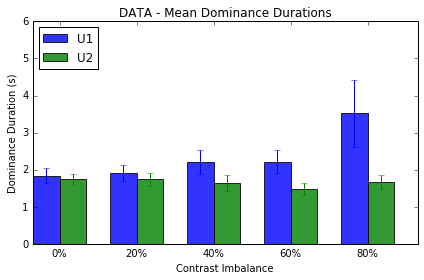

In [65]:
# data to plot
#probability and latency
#
n_groups = 5
sy_U1 = syprob['MEAN']
sySEM_U1 = syU1['SEM']
sy_U2 = syU2['MEAN']
sySEM_U2 = syU2['SEM']
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, sy_U1, bar_width,
                 alpha=opacity,
                 color='blue',
                 label='U1',
                 yerr=sySEM_U1)
 
rects2 = plt.bar(index + bar_width, sy_U2, bar_width,
                 alpha=opacity,
                 color='green',
                 label='U2',
                 yerr=sySEM_U2)
 
plt.xlabel('Contrast Imbalance')
plt.ylabel('Dominance Duration (s)')
plt.ylim(0,6)

plt.title('DATA - Mean Dominance Durations')
plt.xticks(index + bar_width, bindex)
plt.legend(loc=2)
 
plt.tight_layout()
plt.show()
fig = ax.get_figure()       
fig.set_size_inches(8,4)

#fig.savefig('DATA_meandomtimes.png', dpi=100)